In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, dot
import cvxopt
from cvxopt import matrix, solvers

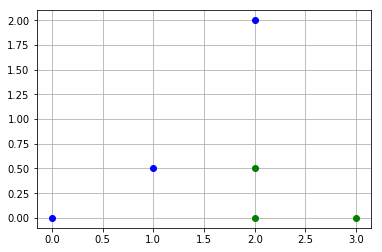

In [2]:
X = np.array([[0,0],[2,2],[1,0.5],[3,0],[2,0],[2.,0.5]])
y = np.array([[-1],[-1],[-1],[1],[1],[1]])

w = np.array([[1.2],[-3.2]])
b = -0.5

#Points de la matrice X
x_neg = [c[0] for c in X[0:3]]
y_neg = [c[1] for c in X[0:3]]
x_pos = [c[0] for c in X[3:6]]
y_pos = [c[1] for c in X[3:6]]

plt.plot(x_neg,y_neg,'bo')
plt.plot(x_pos,y_pos,'go')
plt.grid(True)
plt.show()

In [3]:
Q = [0.] + [1.]*np.shape(w)[0]
Q = np.diag(Q)
n_X = np.shape(X)[0]

A = np.concatenate((np.ones((n_X,1)),X),axis=1)
k,l = np.shape(A)

for i in range(k):
    A[i,:]=A[i,:]*y[i][0]


c = np.ones((n_X,1))

p = np.zeros((3,1))

Q = cvxopt.matrix(Q)
p = cvxopt.matrix(p)
A = cvxopt.matrix(-A)
c = cvxopt.matrix(-c)

"""
print("Q")
print(Q)
print("p")
print(p)
print("-A")
print(A)
print("-c")
print(c)
"""

sol = solvers.qp(Q,p,A,c)

b_opt = sol['x'][0]
w_opt = np.array([[sol['x'][1]],[sol['x'][2]]])

print(b_opt,w_opt)

xx = np.arange(0,4,0.5)
coef_d = -w_opt[0][0]/w_opt[1][0]

yy_opt = [coef_d*e - b_opt/w_opt[1][0] for e in xx]

norme_w_opt = np.linalg.norm(w_opt)
dist = 1/norme_w_opt

yy_plus = [e + dist/np.cos(np.arctan(coef_d)) for e in yy_opt]
yy_moins = [e - dist/np.cos(np.arctan(coef_d)) for e in yy_opt]

     pcost       dcost       gap    pres   dres
 0:  4.0061e-01  4.2541e+00  1e+01  2e+00  5e+00
 1:  2.9405e+00  2.2679e+00  1e+00  5e-02  2e-01
 2:  2.8938e+00  2.8771e+00  2e-02  7e-04  2e-03
 3:  2.8889e+00  2.8888e+00  2e-04  7e-06  2e-05
 4:  2.8889e+00  2.8889e+00  2e-06  7e-08  2e-07
 5:  2.8889e+00  2.8889e+00  2e-08  7e-10  2e-09
Optimal solution found.
-2.3333333341541964 [[ 2.        ]
 [-1.33333334]]


In [4]:
%qtconsole

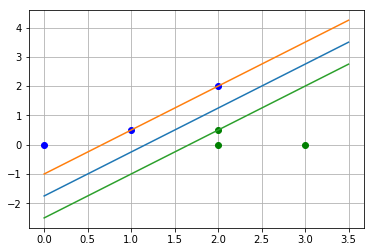

In [5]:
plt.plot(x_neg,y_neg,'bo')
plt.plot(x_pos,y_pos,'go')
plt.plot(xx,yy_opt)
plt.plot(xx,yy_plus)
plt.plot(xx,yy_moins)
plt.grid(True)
plt.show()

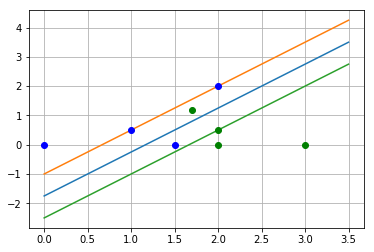

In [6]:
X_new = np.array([[0,0],[2,2],[1,0.5],[1.5,0],[3,0],[2,0],[2.,0.5],[1.7,1.2]])
y_new = np.array([[-1],[-1],[-1],[-1],[1],[1],[1],[1]])


#Points de la matrice X
x_neg = [c[0] for c in X_new[0:4]]
y_neg = [c[1] for c in X_new[0:4]]
x_pos = [c[0] for c in X_new[4:8]]
y_pos = [c[1] for c in X_new[4:8]]


plt.plot(xx,yy_opt)
plt.plot(xx,yy_plus)
plt.plot(xx,yy_moins)
plt.plot(x_neg,y_neg,'bo')
plt.plot(x_pos,y_pos,'go')
#plt.plot(x_new,y_new,'o', color="gray")
plt.grid(True)
plt.show()

In [7]:
n_X = np.shape(X_new)[0]
Q = [0.] + [1.]*np.shape(w)[0]+[0.]*n_X
Q = np.diag(Q)

A = np.concatenate((np.ones((n_X,1)),X_new),axis=1)
k,l = np.shape(A)

for i in range(k):
    A[i,:]=A[i,:]*y_new[i][0]

Azeros = np.zeros((n_X,np.shape(A)[1]))

Aid = np.concatenate((np.identity(n_X),np.identity(n_X)),axis=0)

A = np.concatenate((A,Azeros),axis=0)

A = np.concatenate((A,Aid),axis=1)

c = np.ones((n_X,1))
c = np.concatenate((c,np.zeros((n_X,1))),axis = 0)

p = np.zeros((3,1))
p = np.concatenate((p,np.ones((n_X,1))),axis=0)

Q = cvxopt.matrix(Q)
p = cvxopt.matrix(p)
A = cvxopt.matrix(-A)
c = cvxopt.matrix(-c)

"""
print("Q")
print(Q)
print("p")
print(p)
print("-A")
print(A)
print("-c")
print(c)
"""

sol = solvers.qp(Q,p,A,c)

b_opt = sol['x'][0]
w_opt = np.array([[sol['x'][1]],[sol['x'][2]]])

xx = np.arange(0,4,0.5)
coef_d = -w_opt[0][0]/w_opt[1][0]

yy_opt = [coef_d*e - b_opt/w_opt[1][0] for e in xx]

norme_w_opt = np.linalg.norm(w_opt)
dist = 1/norme_w_opt

yy_plus = [e + dist/np.cos(np.arctan(coef_d)) for e in yy_opt]
yy_moins = [e - dist/np.cos(np.arctan(coef_d)) for e in yy_opt]

     pcost       dcost       gap    pres   dres
 0: -1.8570e+00  1.3455e+01  4e+01  3e+00  3e+00
 1:  9.1002e+00  3.7345e+00  5e+00  4e-16  7e-16
 2:  5.2636e+00  4.5543e+00  7e-01  3e-16  5e-16
 3:  4.9822e+00  4.9263e+00  6e-02  3e-16  3e-15
 4:  4.9603e+00  4.9585e+00  2e-03  3e-16  8e-15
 5:  4.9600e+00  4.9600e+00  2e-05  2e-16  3e-13
 6:  4.9600e+00  4.9600e+00  2e-07  3e-16  1e-13
Optimal solution found.


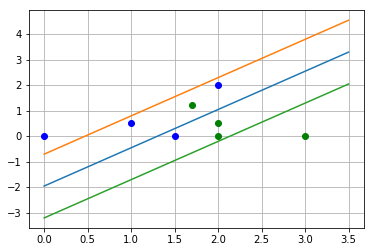

In [8]:
plt.plot(xx,yy_opt)
plt.plot(xx,yy_plus)
plt.plot(xx,yy_moins)
plt.plot(x_neg,y_neg,'bo')
plt.plot(x_pos,y_pos,'go')
#plt.plot(x_new,y_new,'o', color="gray")
plt.grid(True)
plt.show()


In [23]:
def fonction_decision(x,w,b):
    return np.dot(np.transpose(w),x)+b

In [9]:
from sklearn import svm

In [10]:
clf = svm.SVC(kernel="linear")
clf.fit(X_new, y_new)  

/home/thoreau/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf.predict(X_new)

array([-1, -1, -1,  1,  1,  1,  1, -1])

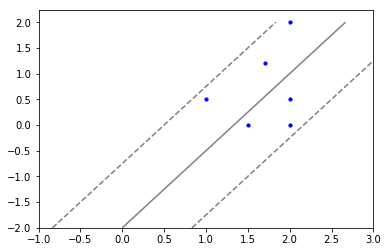

In [16]:
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(-1, 3, 9)
yy = np.linspace(-2, 2, 9)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
           linewidth=1, facecolors='blue', edgecolors='blue')
plt.show()